# LOADING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import date
import pystan
%matplotlib inline

# LOADING DATA

In [2]:
data = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/weekly_in_situ_co2_mlo.csv')
data.head()

,date,CO2
0,29/03/1958,316.19
1,05/04/1958,317.31
2,12/04/1958,317.69
3,19/04/1958,317.58
4,26/04/1958,316.48


In [3]:
#____________   Preparing the data for Stan model   ____________ 

'''I am converting here data['date'] into the number of days that passed from the first measurement,
so later on I can create my Stan model using daily intervals'''

days = []

for i in data.date:
    year = int(i[6:10]) #indexing the year 
    month = int(i[3:5]) #indexing the month
    day = int(i[0:2]) #indexing the day
    
    first = date(1958,3,29)  #first date in the dataset 
    current = date(year,month,day) 
    
    delta = (current-first).days 
    days.append(delta)


In [4]:
#____________   Converting data['date'] into date time format   ____________ 

'''I will use this converted date time data in order to plot an overall trend'''

date_ = [] 

for i in data['date']:
    date_str = str(i)
    format_str = '%d/%m/%Y'
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_.append(datetime_obj)   

# OVERALL TREND

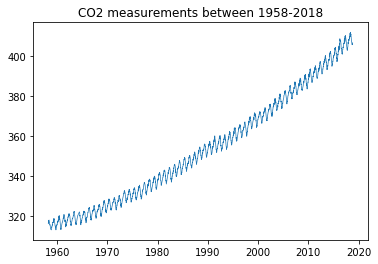

In [5]:
#____________   Overall trend   ____________ 

'''The plotted general trend revieled that the behavior of the overall trend is not linear, rather it is a 
transformation of a quadratic function'''

plt.plot(date_,data['CO2'],linewidth=0.7)
plt.title("CO2 measurements between 1958-2018")
plt.show()

# SEASONAL CHANGE

In [6]:
#____________   Plotting seasonal changes   ____________ 

''' Here we first will investigate the assumption that there is more CO2 consumption in winter 
and less in spring and summer. I will aim at both validating those assumptions here and assesing 
the shape of the seasonal fluctuations. I will look at yearly fluctuations in CO2 emmissions in 10 year ranges.'''


#________  Selecting data for 1960  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1960-1-1') & (data['date'] <= '1960-12-31')
_1960 = data.loc[mask]
_1960 = _1960.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 1970  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1970-1-1') & (data['date'] <= '1970-12-31')
_1970 = data.loc[mask]
_1970 = _1970.sort_values(by='date') #sorting the dataframe by dates 


#________  Selecting data for 1980  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1980-1-1') & (data['date'] <= '1980-12-31')
_1980 = data.loc[mask]
_1980 = _1980.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 1990  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '1990-1-1') & (data['date'] <= '1990-12-31')
_1990 = data.loc[mask]
_1990 = _1990.sort_values(by='date') #sorting the dataframe by dates 

#________  Selecting data for 2000  ________  

data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '2000-1-1') & (data['date'] <= '2000-12-31')
_2000 = data.loc[mask]
_2000 = _2000.sort_values(by='date') #sorting the dataframe by dates 


#________  Selecting data for 2010  ________  
data['date'] = pd.to_datetime(data['date']) 
mask = (data['date'] > '2010-1-1') & (data['date'] <= '2010-12-31')
_2010 = data.loc[mask]
_2010 = _2010.sort_values(by='date') #sorting the dataframe by dates 

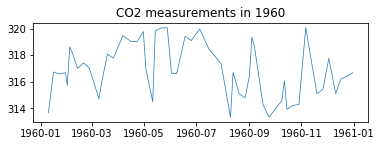

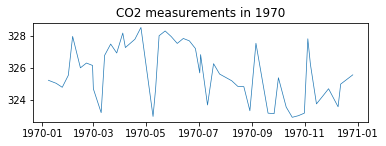

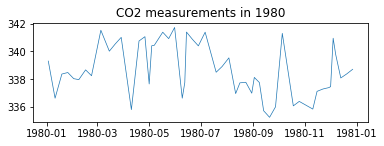

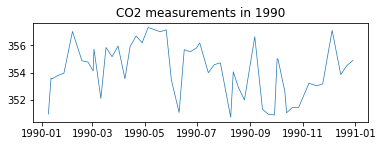

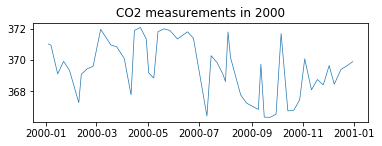

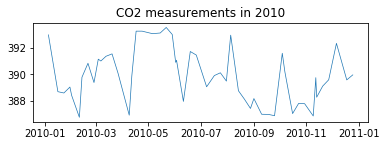

In [7]:
#____________   Plotting the yearly CO2 emmissions for six 10 year time intervals   ____________

'''The graphs plotted in a cell below show that the assumption that in winter the CO2 emission 
is higher and in summer and spring it drops is confirmed. Also, we notice that there is quite a 
lot of noise in the grahs below, thus one would need to take into consideration this difficulty 
during the decision process of the shape of the seasonal fluctuations.'''

plt.subplot(2, 1, 2)
plt.plot(_1960['date'],_1960['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1960")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1970['date'],_1970['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1970")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1980['date'],_1980['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1980")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_1990['date'],_1990['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 1990")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_2000['date'],_2000['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 2000")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(_2010['date'],_2010['CO2'],linewidth=0.7)
plt.title("CO2 measurements in 2010")
plt.show()

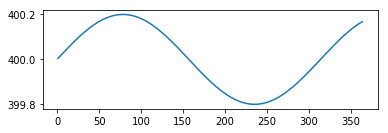

In [8]:
#____________   Plotting seasonal trend   ____________ 

'''Below, I plotted a reference graph of a sine function, which would be the approximate fit of 
the trends in data above. I will further test whether this is a good approximation of the 
seasonal trends below using the averaged monthly data.'''

plt.subplot(2, 1, 2)
x = np.arange(1,365,1)
y = 0.2*np.sin(0.02*x)+400
plt.plot(x,y)
plt.show()

In [9]:
#____________   Re-creating the seasonal trend plot for averaged data   ____________ 

'''esting my shape assumption by taking a random year (1960) and taking the average for each month 
and plotting the averages from each month to be able to deterine whether my shape assumption is correct'''

_1960_jan = (_1960['date'] >= '1960-1-1') & (_1960['date'] <= '1960-1-31')
_1960_feb = (_1960['date'] >= '1960-2-1') & (_1960['date'] <= '1960-2-29')
_1960_mar = (_1960['date'] >= '1960-3-1') & (_1960['date'] <= '1960-3-30')
_1960_apr = (_1960['date'] >= '1960-4-1') & (_1960['date'] <= '1960-4-30')
_1960_may = (_1960['date'] >= '1960-5-1') & (_1960['date'] <= '1960-5-30')
_1960_jun = (_1960['date'] >= '1960-6-1') & (_1960['date'] <= '1960-6-30')
_1960_jul = (_1960['date'] >= '1960-7-1') & (_1960['date'] <= '1960-7-30')
_1960_aug = (_1960['date'] >= '1960-8-1') & (_1960['date'] <= '1960-8-30')
_1960_sep = (_1960['date'] >= '1960-9-1') & (_1960['date'] <= '1960-9-30')
_1960_oct = (_1960['date'] >= '1960-10-1') & (_1960['date'] <= '1960-10-30')
_1960_nov = (_1960['date'] >= '1960-11-1') & (_1960['date'] <= '1960-11-30')
_1960_dec = (_1960['date'] >= '1960-12-1') & (_1960['date'] <= '1960-12-30')

jan = _1960.loc[_1960_jan]
feb = _1960.loc[_1960_feb]
mar = _1960.loc[_1960_mar]
apr = _1960.loc[_1960_apr]
may = _1960.loc[_1960_may]
jun = _1960.loc[_1960_jun]
jul = _1960.loc[_1960_jul]
aug = _1960.loc[_1960_aug]
sep = _1960.loc[_1960_sep]
Oct = _1960.loc[_1960_oct]
nov = _1960.loc[_1960_nov]
dec = _1960.loc[_1960_dec]

jan = np.mean(jan['CO2'])
feb = np.mean(feb['CO2'])
mar = np.mean(mar['CO2'])
apr = np.mean(apr['CO2'])
may = np.mean(may['CO2'])
jun = np.mean(jun['CO2'])
jul = np.mean(jul['CO2'])
aug = np.mean(aug['CO2'])
sep = np.mean(sep['CO2'])
Oct = np.mean(Oct['CO2'])
nov = np.mean(nov['CO2'])
dec = np.mean(dec['CO2'])

co2 = [jan,feb,mar,apr,may, jun, jul, aug, sep, Oct, nov, dec]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

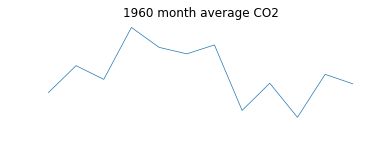

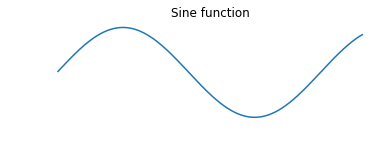

In [10]:
#____________   Sine function versus averaged seasonal trends data   ____________ 

'''Below I plot the averaged data for 1960 and the sine function and I reach conclusion that 
sine function would be the appropriate choice for the seasonal trends.'''

plt.subplot(2, 1, 2)
plt.plot(months,co2,linewidth=0.7)
plt.axis('off')
plt.title('1960 month average CO2')
plt.show()

plt.subplot(2, 1, 2)
ix = np.arange(1,365,1)
y = 0.2*np.sin(0.02*ix)+400
plt.plot(ix,y)
plt.axis('off')
plt.title('Sine function')
plt.show()

# OVERALL TREND - STAN MODEL

In [11]:
stan_data = {
    'N':3091, #Total number of measurements in a dataset 
    'co2': data['CO2'], #actual CO2 measurements data
    'days': days, #Converted data['date'] into the number of days that passed from the first measurement
}

In [12]:
stan_overall_trend = """

//Known data 

data {
    int<lower=1> N;  // number of datapoints
    real<lower=0> co2[N];  // C02 concentration data
    real<lower=0> days[N]; // Converted data['date']
}

//Unknown data  

parameters {
    real<lower=0> c; //a,b,c, d are transforming the quadratic function
    real<lower=0> b;
    real<lower=0> a; 
    real<lower=0> d;
}

//The model follows the functional form of the quadratic function: ax^2 +bx + c

model { 
    
    c ~ gamma(100,0.3); //this is the intercept of y which need to be around the value 316.19 
    b ~ normal(0.01,0.01); //linear term intercept 
    a ~ normal(0.01,0.01); //quadratic term intercept
    d ~ cauchy(1,1); //noise 
    
    for (j in 1:N){
    
      co2[j] ~ normal( b*days[j]+ a*(days[j])^2 + c, d); 
    }
    
}

//We generate posterior predictive distribution

generated quantities{
  real predicted_co2_values[N];
  for(j in 1:N){
    predicted_co2_values[j] = normal_rng(c + b*days[j]+ a*(days[j])^2 , d) ; 
    }

}

"""

In [13]:
stan_model = pystan.StanModel(model_code=stan_overall_trend)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b6da90eebec4bf7bf80c02d76926d3ec NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmp05a3qse0/stanfit4anon_model_b6da90eebec4bf7bf80c02d76926d3ec_3037224787152238461.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [14]:
stan_results = stan_model.sampling(data=stan_data)

/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
#____________   Results of long term trend model   ____________ 

'''Here we can see that Rhat values are = 1, thus our model converged. The effective sample size n_eff 
also is sufficiently high.'''

print(stan_results.stansummary(pars=['c','b','a','d']))

Inference for Stan model: anon_model_b6da90eebec4bf7bf80c02d76926d3ec.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c  314.5  3.7e-3   0.13 314.23 314.41  314.5 314.59 314.77   1354    1.0
b 2.1e-3  8.8e-7 2.8e-5 2.1e-3 2.1e-3 2.1e-3 2.1e-3 2.2e-3    999    nan
a 9.6e-8 3.8e-11 1.2e-9 9.3e-8 9.5e-8 9.6e-8 9.7e-8 9.8e-8    990    nan
d   2.24  7.7e-4   0.03   2.19   2.22   2.24   2.26    2.3   1415    1.0

Samples were drawn using NUTS at Tue Dec 18 16:18:18 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [16]:
#____________   We extract the posterior predicted values   ____________ 

posterior = stan_results.extract()
post_predictive = posterior['predicted_co2_values']

In [17]:
predictive_means = []

for i in range(0,3091):
    predictive_means.append(np.mean(post_predictive[:,i]))

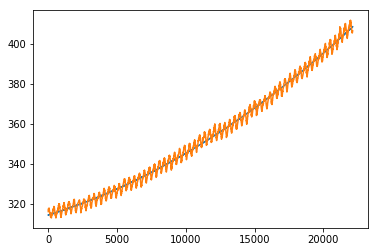

In [18]:
#____________   Plotting predicted values from Stan against raw data   ____________ 

x = days
y1 = predictive_means
y2 = data['CO2']

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

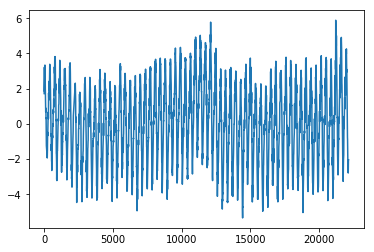

In [19]:
#____________   Plotting residuals from the first model   ____________ 

y1 = predictive_means
y2 = data['CO2']

residuals = []
for i in range(0,3091):
    residuals.append(y2[i]-y1[i])

plt.plot(x,residuals)
plt.show()

# SEASONAL TREND - STAN MODEL

In [20]:
stan_data_seasonal = {
    'N':3091,
    'residuals': residuals,
    'days': days,
    'period': 365.25
}

stan_code__seasonal = """

//Known data 

data {
    int<lower=1> N;  // number of datapoints
    real residuals[N];  // C02 concentration data
    real<lower=0> days[N];
    real<lower=0> period;    
}

//Unknown data

parameters {
    real<lower=0> a; //amplitude
    real<lower=0> n; // noise
    real<lower=0> phi; // c1*sin(phi) will be the intercept
}

//The model follows the sin function general form
model { 
    a ~ normal(3,0.5); //amplitude centered at 3
    n ~ cauchy(2,1); //Noise centered at 2 and sd 1
    
    for (j in 1:N){
    
      residuals[j] ~ normal(a*sin(2*pi()*days[j]/period + phi), n); 
    }
    
}

generated quantities{
  real predicted_residuals[N];
  for(j in 1:N){
    predicted_residuals[j] = normal_rng(a*sin(2*pi()*days[j]/period + phi), n) ; 
    }

}

"""

In [21]:
stan_model_2 = pystan.StanModel(model_code=stan_code__seasonal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_acfd1aa604101520e8aa64279963da28 NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmpubxrokp7/stanfit4anon_model_acfd1aa604101520e8aa64279963da28_4837068839736649199.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [22]:
#____________   Results of seasonal trend model   ____________ 

'''Here we can see that Rhat values are = 1, thus our model converged. The effective sample size n_eff 
also is sufficiently high.'''

stan_results_2 = stan_model_2.sampling(data=stan_data_seasonal)
print(stan_results_2.stansummary(pars=['a','n','phi']))

Inference for Stan model: anon_model_acfd1aa604101520e8aa64279963da28.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     2.86  4.0e-4   0.02   2.81   2.84   2.86   2.88   2.91   3867    1.0
n     0.97  2.0e-4   0.01   0.95   0.96   0.97   0.98    1.0   3682    1.0
phi   1.15  1.4e-4 8.6e-3   1.14   1.15   1.15   1.16   1.17   3634    1.0

Samples were drawn using NUTS at Tue Dec 18 16:19:28 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [23]:
posterior_2 = stan_results_2.extract()
post_predictive_2 = posterior_2['predicted_residuals']

predictive_residuals = []  #taking the mean values of the predicted from posterior

for i in range(0,3091):
    predictive_residuals.append(np.mean(post_predictive_2[:,i]))

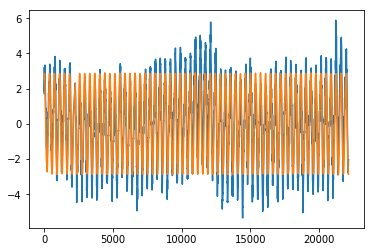

In [24]:
#____________   Plotting residuals of a seasonal trend model   ____________ 

y3 = predictive_residuals
y4 = residuals

plt.plot(x,y4)
plt.plot(x,y3)
plt.show()

# NOISE

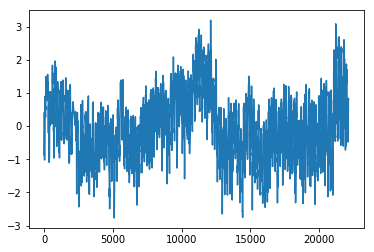

In [25]:
#____________   Plotting the noise   ____________ 

'''From this shape of the noise function we can conclude that potential improvements to our model could 
be fitting multiple sin functions, however the danger will be that even though we implement more complicated
function for seasonal trends we will still not be able to eliminate this sinusoidal shape of the noise curve'''

noise = []
for i in range(0,3091):
    noise.append(y4[i]-y3[i])

plt.plot(x,noise)
plt.show()

# PREDICTING FUTURE VALUES

In [26]:
#____________   Adding additional 40 years that we will predict for   ____________ 

final_day = days[3090]

for i in range(2086):  #7 day intervals 40years * 365 / 7 = 2086
    new_day = final_day + (7*(i+1))
    days.append(new_day)

In [27]:
stan_data_long = {
    'N':3091, #Total number of measurements in a dataset
    'N_future': 5177, #Total number of measurements in a dataset 
    'co2': data['CO2'], #actual CO2 measurements data
    'days': days, #Converted data['date'] into the number of days that passed from the first measurement
}

stan_code_long = """

//Known data 

data {
    int<lower=1> N;  // number of datapoints
    int<lower=1> N_future; //number of datapoints with future years included
    real<lower=0> co2[N];  // C02 concentration data
    real<lower=0> days[N_future]; // Converted data['date']
}

//Unknown data - Parameters 

parameters {
    real<lower=0> c;
    real<lower=0> b;
    real<lower=0> a; //a - determines how stretched horizontally our function is
    real<lower=0> d;
    
}

//The model follows the functional form of the quadratic function: ax^2 +bx
//days[j] 

model { 
    
    c ~ gamma(100,0.3); //this is the intercept of y which need to be around the value 316.19 
    b ~ normal(0.01,0.01); //linear term intercept 
    a ~ normal(0.01,0.01);
    d ~ cauchy(1,1);
    
    for (j in 1:N){
    
      co2[j] ~ normal( b*days[j]+ a*(days[j])^2 + c, d); 
    }
    
}

generated quantities{
  real predicted_co2_values[N_future];
  for(j in 1:N_future){
    predicted_co2_values[j] = normal_rng(c + b*days[j]+ a*(days[j])^2 , d) ; 
    }

}

"""

In [28]:
stan_model = pystan.StanModel(model_code=stan_code_long)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9935aa151f5b00bd32781262133965ca NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmpt0amqv81/stanfit4anon_model_9935aa151f5b00bd32781262133965ca_7101590193963276035.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [29]:
#____________   Results of future trend prediction model   ____________ 

'''Here we can see that Rhat values are = 1, thus our model converged. The effective sample size n_eff 
also is sufficiently high.'''

stan_results_long = stan_model.sampling(data=stan_data_long)
print(stan_results_long.stansummary(pars=['c','b','a','d']))

Inference for Stan model: anon_model_9935aa151f5b00bd32781262133965ca.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c  314.5  3.2e-3   0.12 314.26 314.42 314.51 314.59 314.74   1448    1.0
b 2.1e-3  7.4e-7 2.5e-5 2.1e-3 2.1e-3 2.1e-3 2.1e-3 2.2e-3   1157    nan
a 9.6e-8 3.2e-11 1.1e-9 9.4e-8 9.5e-8 9.6e-8 9.7e-8 9.8e-8   1181    nan
d   2.24  7.4e-4   0.03   2.19   2.22   2.24   2.26    2.3   1484    1.0

Samples were drawn using NUTS at Tue Dec 18 16:21:09 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [30]:
#____________   We extract the posterior predicted values   ____________ 

post = stan_results_long.extract()
post_pred = post['predicted_co2_values']

In [31]:
#____________   We take the means of the predictions   ____________ 

predictive_means = []

for i in range(0,5177):
    predictive_means.append(np.mean(post_pred[:,i]))

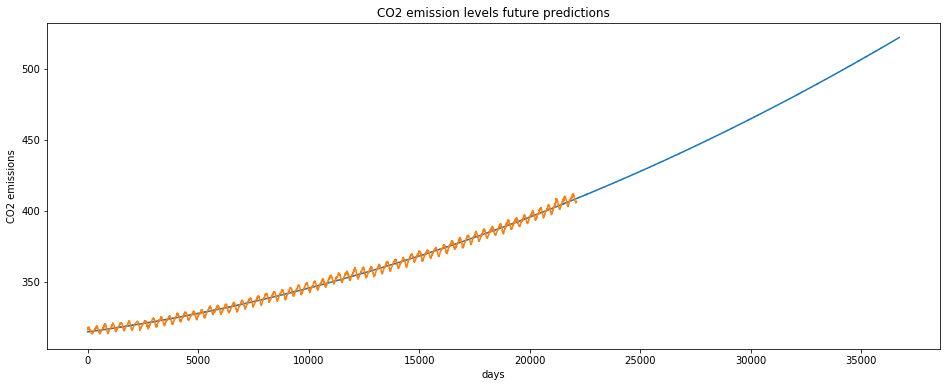

In [32]:
#____________   Plotting future trend with additional 40 years   ____________ 

'''The figure below displays in orange the CO2 emissions for known years, which we were given in the initial 
dataset. The blue line is the future trend line which we will later on useto predict future values 
of CO2 emissions'''

plt.figure(figsize=(16,6))
plt.plot(days,predictive_means)
plt.plot(days[0:3091],data['CO2'])
plt.xlabel('days')
plt.ylabel('CO2 emissions')
plt.title('CO2 emission levels future predictions')
plt.show()

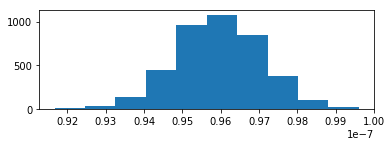

Posterior 95% interval over a: [9.37205991e-08 9.80599141e-08]


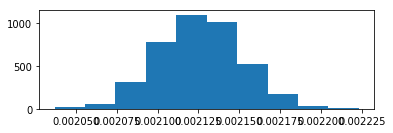

Posterior 95% interval over b: [0.0020775  0.00217593]


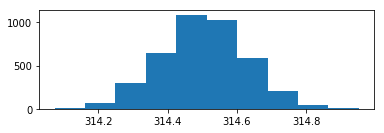

Posterior 95% interval over c: [314.25904306 314.7406273 ]


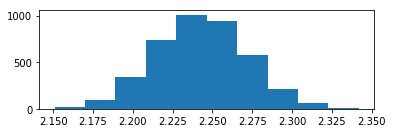

Posterior 95% interval over d: [2.18790283 2.29896906]


In [33]:
plt.subplot(2, 1, 2)
plt.hist(post['a'])
plt.show()
print('Posterior 95% interval over a:', np.percentile(post['a'], [2.5, 97.5]))

plt.subplot(2, 1, 2)
plt.hist(post['b'])
plt.show()
print('Posterior 95% interval over b:', np.percentile(post['b'], [2.5, 97.5]))

plt.subplot(2, 1, 2)
plt.hist(post['c'])
plt.show()
print('Posterior 95% interval over c:', np.percentile(post['c'], [2.5, 97.5]))

plt.subplot(2, 1, 2)
plt.hist(post['d'])
plt.show()
print('Posterior 95% interval over d:', np.percentile(post['d'], [2.5, 97.5]))

# ESTIMATE OF CO2 EMISSIONS IN 2058

In [34]:
print (('Beggining of 2058 is at the {}th day after the initial measurement').format(days[-1]))

Beggining of 2058 is at the 36729th day after the initial measurement


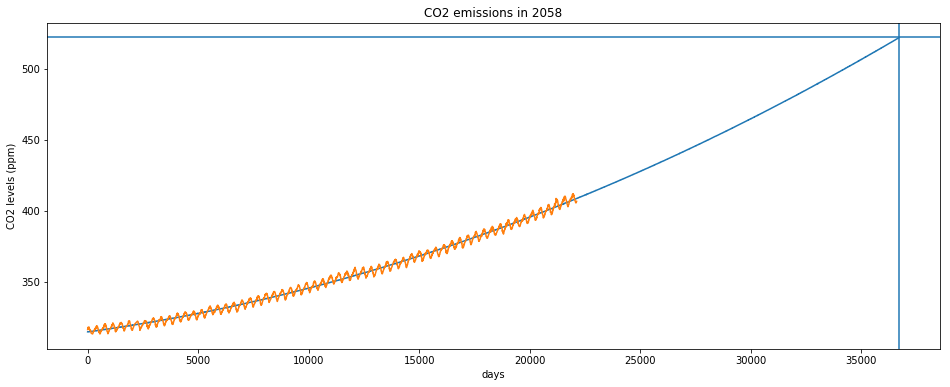

At the beggining of 2058 the estimated CO2 levels are 522ppm


In [35]:
#____________   Plotting the estimated emissions in 2058   ____________ 

'''The point at which the vertical line at x = 36729 crosses the prediction line I plot
a horizontal line indicating the corresponding CO2 emmission level for the beggining of 2058'''

plt.figure(figsize=(16,6))
plt.plot(days,predictive_means)
plt.plot(days[0:3091],data['CO2'])
plt.axhline(y=522)
plt.axvline(x=36729)
plt.xlabel('days')
plt.ylabel('CO2 levels (ppm)')
plt.title('CO2 emissions in 2058')
plt.show()

print ('At the beggining of 2058 the estimated CO2 levels are 522ppm')

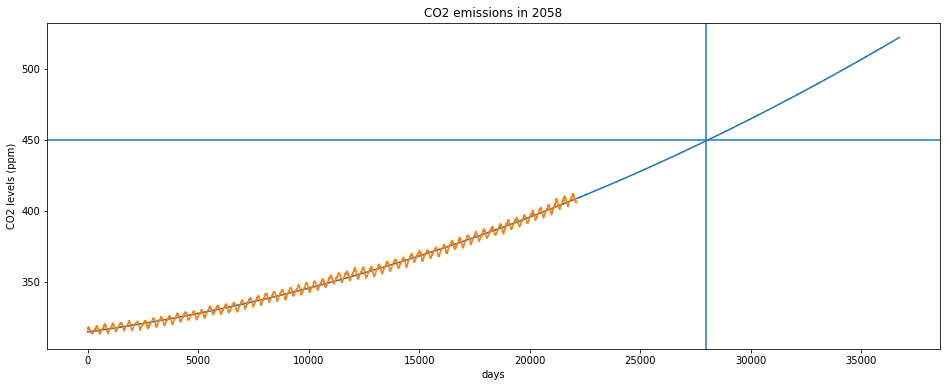


CO2 emissions will cross the 450ppm boundry on 26th January 2034 


In [36]:
#____________   Plotting the estimated of when the CO2 emissions would become heigher than 450ppm   ____________ 

'''The point at which the vertical line at x = 36729 crosses the prediction line I plot
a horizontal line indicating the corresponding CO2 emmission level for the beggining of 2058
In a cell below I decoded the x value into a date, which is 1/26/2034. This is the estimated 
date for the CO2 emmissions ro cross the 450ppm boundry '''

plt.figure(figsize=(16,6))
plt.plot(days,predictive_means)
plt.plot(days[0:3091],data['CO2'])
plt.axhline(y=450)
plt.axvline(x=28000)
plt.xlabel('days')
plt.ylabel('CO2 levels (ppm)')
plt.title('CO2 emissions in 2058')
plt.show()

print ("")
print('CO2 emissions will cross the 450ppm boundry on 26th January 2034 ')

In [37]:
#____________   Decoding the x = 28000   ____________ 

#Here we have the last non-generated day and the day whose value corresponds to x= 28000
print (days[3091], days[3929])  #838

#The difference between days indicies
print('Delta days:',3929 - 3091)

#last date non-generated
print ('Last non-generated date: 27/10/2018')

#838 in weekly intervals 
print ('Weekly intervals', 838*7)

#Getting the correct year
print ('Years apart',5866/365)

#Getting the month and day 
print("Month and day: January",5866%365)

print (' ')
print('Final date decoded: 1/26/2034')



22134 28000
Delta days: 838
Last non-generated date: 27/10/2018
Weekly intervals 5866
Years apart 16.07123287671233
Month and day: January 26
 
Final date decoded: 1/26/2034
